In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [2]:
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 다항회귀

## 변수 선택
* 3가지 독립변수 모두 선택

In [27]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [28]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 다항변환

In [29]:
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree=3, include_bias=False)
X_train_ploy = ploy.fit_transform(X_train)
X_test_ploy = ploy.fit_transform(X_test)

X_train_ploy.shape

(150, 19)

<Axes: >

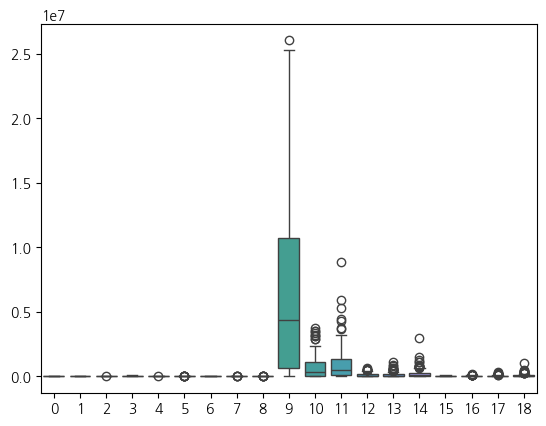

In [30]:
sns.boxplot(X_train_ploy)

## 스케일링

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_ploy_scaled = scaler.fit_transform(X_train_ploy)
X_test_ploy_scaled = scaler.transform(X_test_ploy)

<Axes: >

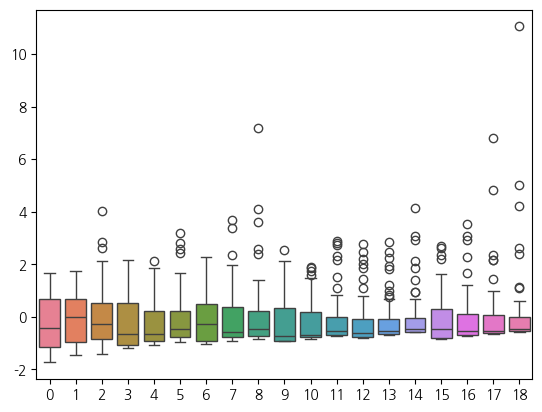

In [32]:
sns.boxplot(X_test_ploy_scaled)

## 모델 생성 및 훈련

In [33]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train_ploy_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 평가

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model.predict(X_test_ploy_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('===다항회귀 모델의 평가결과===')
print(f'R2:{r2:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')

===다항회귀 모델의 평가결과===
R2:0.94
RMSE:1.32
MAE:0.95
MSE:1.73


In [35]:
model.score(X_train_ploy_scaled, y_train)

0.9363844104766007

## Ridge

In [36]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train_ploy_scaled, y_train)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model_ridge.predict(X_test_ploy_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('===릿지 모델의 평가결과===')
print(f'R2:{r2:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')

===릿지 모델의 평가결과===
R2:0.94
RMSE:1.29
MAE:0.98
MSE:1.67
